In [5]:
import pandas as pd
df=pd.read_csv("MinimumWageData.csv", encoding="latin")


In [6]:
df.to_csv("MinWageData.csv", encoding="utf=8")

In [7]:
df=pd.read_csv("MinWageData.csv")
df.head(5)

,Unnamed: 0,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,1968,Alabama,...,NaN,0.00000,0.00000,34.783333,0.00,0.00
1,1,1968,Alaska,2.10,NaN,2.10000,2.10000,34.783333,15.12,15.12
2,2,1968,Arizona,18.72 - 26.40/wk(b),(b),0.66000,0.46800,34.783333,4.75,3.37
3,3,1968,Arkansas,1.25/day(b),(b),0.15625,0.15625,34.783333,1.12,1.12
4,4,1968,California,1.65(b),(b),1.65000,1.65000,34.783333,11.88,11.88


In [18]:
act_min_wage = pd.DataFrame()

for name, group in df.groupby("State"):
    if act_min_wage.empty:
        act_min_wage = group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name})
    else:
        act_min_wage = act_min_wage.join(group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name}))

act_min_wage.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,0.0,15.12,3.37,1.12,11.88,7.20,10.08,9.00,9.00,8.28,...,0.0,0.00,NaN,7.20,10.08,0.0,11.52,7.20,9.00,8.64
1969,0.0,14.33,3.19,1.07,11.26,6.83,9.56,8.53,8.53,7.85,...,0.0,0.00,NaN,6.83,9.56,0.0,10.92,6.83,8.53,8.19
1970,0.0,13.54,3.02,7.09,10.64,6.45,10.32,8.06,10.32,8.38,...,0.0,0.00,NaN,6.45,10.32,0.0,10.32,6.45,8.38,8.38
1971,0.0,12.99,2.89,6.80,10.20,6.18,9.89,7.73,9.89,8.04,...,0.0,0.00,NaN,6.18,9.89,0.0,9.89,6.18,8.04,8.04
1972,0.0,12.57,2.80,7.19,9.88,5.99,11.08,9.58,9.58,9.58,...,0.0,8.38,NaN,7.19,9.58,0.0,9.58,7.19,8.68,8.98


In [19]:
act_min_wage.describe()
act_min_wage.corr().head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,NaN,1.000000,0.018638,-0.377934,0.717653,-0.129332,0.680886,0.258997,0.321785,0.637679,...,NaN,-0.522472,0.277016,-0.020462,0.663558,-0.601640,0.411593,0.044814,0.702570,0.727932
Arizona,NaN,0.018638,1.000000,0.089395,0.498994,0.742527,0.458163,0.429836,0.590848,-0.049914,...,NaN,0.369900,-0.758607,0.439344,0.517960,0.047405,0.587975,0.584596,0.131588,0.346528
Arkansas,NaN,-0.377934,0.089395,1.000000,-0.234367,0.135749,0.047580,0.016125,0.266889,0.117245,...,NaN,0.503242,-0.204485,0.194680,0.087429,0.582192,-0.072343,0.420819,0.000470,-0.250592
California,NaN,0.717653,0.498994,-0.234367,1.000000,0.483313,0.876215,0.479197,0.596865,0.371966,...,NaN,-0.239533,-0.417782,0.392898,0.877922,-0.326364,0.754085,0.371765,0.584067,0.722617


In [20]:
issue_df=df[df["Low.2018"]==0]
issue_df.head(5)

,Unnamed: 0,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,1968,Alabama,...,NaN,0.0,0.0,34.783333,0.0,0.0
10,10,1968,Florida,...,NaN,0.0,0.0,34.783333,0.0,0.0
11,11,1968,Georgia,...,NaN,0.0,0.0,34.783333,0.0,0.0
15,15,1968,Illinois,...,NaN,0.0,0.0,34.783333,0.0,0.0
17,17,1968,Iowa,...,NaN,0.0,0.0,34.783333,0.0,0.0


In [21]:
issue_df["State"].unique()

array(['Alabama', 'Florida', 'Georgia', 'Illinois', 'Iowa', 'Kansas',
       'Louisiana', 'Mississippi', 'Missouri', 'Montana',
       'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'Arizona'],
      dtype=object)

In [22]:
import numpy as np

act_min_wage.replace(0,np.NaN).dropna(axis=1).corr().head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,...,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.377934,0.717653,-0.129332,0.680886,0.258997,0.321785,0.637679,0.787915,0.672620,...,0.610814,-0.038118,0.652353,-0.326316,-0.020462,0.663558,0.411593,0.044814,0.702570,0.727932
Arkansas,-0.377934,1.000000,-0.234367,0.135749,0.047580,0.016125,0.266889,0.117245,0.039593,0.204801,...,0.159923,0.232186,0.003498,0.800116,0.194680,0.087429,-0.072343,0.420819,0.000470,-0.250592
California,0.717653,-0.234367,1.000000,0.483313,0.876215,0.479197,0.596865,0.371966,0.492052,0.519241,...,0.429061,0.512712,0.780916,-0.036787,0.392898,0.877922,0.754085,0.371765,0.584067,0.722617
Colorado,-0.129332,0.135749,0.483313,1.000000,0.402020,0.566304,0.673371,-0.232035,-0.192616,0.069800,...,-0.136195,0.657364,0.429852,0.399137,0.622330,0.448485,0.612637,0.533623,0.011501,0.130053
Connecticut,0.680886,0.047580,0.876215,0.402020,1.000000,0.552613,0.652488,0.487750,0.632073,0.621503,...,0.531769,0.626712,0.802485,0.105707,0.302538,0.898469,0.715691,0.400099,0.585790,0.814971


In [27]:
min_wage_corr=act_min_wage.replace(0,np.NaN).dropna(axis=1).corr()
for problem in issue_df['State'].unique():
    if problem in min_wage_corr.columns:
        print("We are missing something here")

In [28]:
grouped_issues=issue_df.groupby("State")
grouped_issues.get_group("Alabama").head()

,Unnamed: 0,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,1968,Alabama,...,NaN,0.0,0.0,34.783333,0.0,0.0
55,55,1969,Alabama,...,NaN,0.0,0.0,36.683333,0.0,0.0
110,110,1970,Alabama,...,NaN,0.0,0.0,38.825000,0.0,0.0
165,165,1971,Alabama,...,NaN,0.0,0.0,40.491667,0.0,0.0
220,220,1972,Alabama,...,NaN,0.0,0.0,41.816667,0.0,0.0


In [29]:
for state, data in grouped_issues:
    if data['Low.2018'].sum()!=0.0:
        print("We missed something")

In [31]:
act_min_wage = pd.DataFrame()

for name, group in df.groupby("State"):
    if act_min_wage.empty:
        act_min_wage = group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name})
    else:
        act_min_wage = act_min_wage.join(group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name}))

act_min_wage.head()
min_wage_corr=act_min_wage.replace(0,np.NaN).dropna(axis=1).corr()



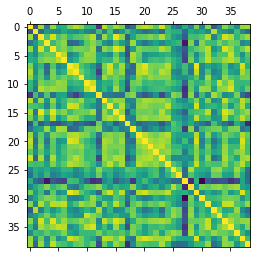

In [34]:
import matplotlib.pyplot as plt
plt.matshow(min_wage_corr)

In [35]:
labels=[ c[:2] for c in min_wage_corr.columns]

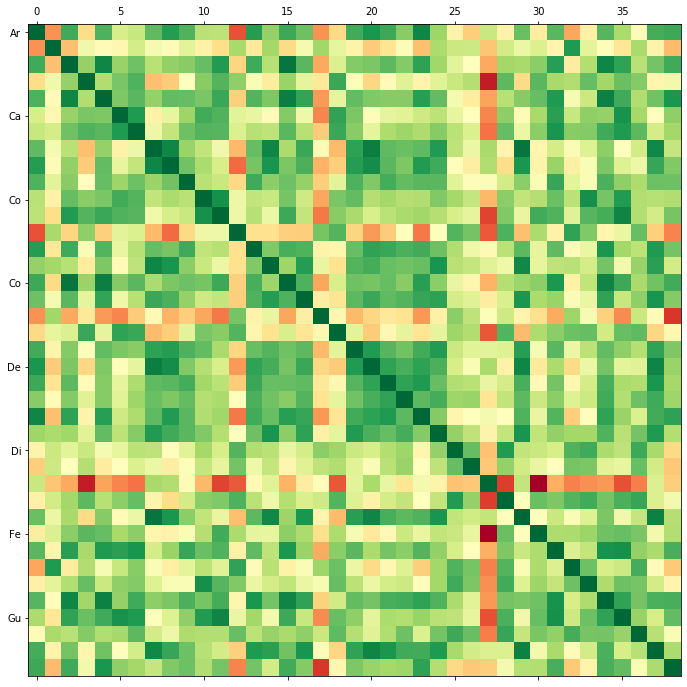

In [43]:
fig= plt.figure(figsize=(12,12))
ax= fig.add_subplot(111)
ax.set_xticks(np.arange(len(labels)))
ax.set_xticks(np.arange(len(labels)))

ax.set_yticklabels(labels)
ax.set_yticklabels(labels)

ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn)

plt.show()

In [47]:
import pandas as pd

import requests

web=requests.get("https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes")

dfs=pd.read_html(web.text)

In [48]:
for df in dfs:
    print(df.head())

  State/District Abbreviation Postal Code
0        Alabama         Ala.          AL
1         Alaska       Alaska          AK
2        Arizona        Ariz.          AZ
3       Arkansas         Ark.          AR
4     California       Calif.          CA
  Territory/Associate Abbreviation Postal Code
0      American Samoa          NaN          AS
1                Guam         Guam          GU
2    Marshall Islands          NaN          MH
3          Micronesia          NaN          FM
4   Northern Marianas          NaN          MP


In [64]:
state_abbv=dfs[0]
state_abbv.head()

,State/District,Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [67]:
state_abbv.to_csv("state_abbv.csv", index=False )

state_abbv=pd.read_csv("state_abbv.csv",index_col=0)

state_abbv.head()

,State/District,Abbreviation,Postal Code
Unnamed: 0,,,
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [69]:
abbv_dict= state_abbv[["Postal Code"]].to_dict()
abbv_dict

{'Postal Code': {0: 'AL',
  1: 'AK',
  2: 'AZ',
  3: 'AR',
  4: 'CA',
  5: 'CO',
  6: 'CT',
  7: 'DE',
  8: 'DC',
  9: 'FL',
  10: 'GA',
  11: 'HI',
  12: 'ID',
  13: 'IL',
  14: 'IN',
  15: 'IA',
  16: 'KS',
  17: 'KY',
  18: 'LA',
  19: 'ME',
  20: 'MD',
  21: 'MA',
  22: 'MI',
  23: 'MN',
  24: 'MS',
  25: 'MO',
  26: 'MT',
  27: 'NE',
  28: 'NV',
  29: 'NH',
  30: 'NJ',
  31: 'NM',
  32: 'NY',
  33: 'NC',
  34: 'ND',
  35: 'OH',
  36: 'OK',
  37: 'OR',
  38: 'PA',
  39: 'RI',
  40: 'SC',
  41: 'SD',
  42: 'TN',
  43: 'TX',
  44: 'UT',
  45: 'VT',
  46: 'VA',
  47: 'WA',
  48: 'WV',
  49: 'WI',
  50: 'WY'}}

In [74]:
labels=[abbv_dict[c] for c in min_wage_corr.columns]

KeyError: 'California'

In [71]:
abbv_dict['Alaska']='ALA'

In [73]:
abbv_dict['Arkansas']='ARK'